In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
df1 = pd.read_csv('./city_data.csv')
df2 = pd.read_csv('./ride_data.csv')

In [13]:
df1.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
df2.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [15]:
dfM = pd.merge(df1, df2, on='city')
dfM.head()

,city,driver_count,type,date,fare,ride_id
2370,Jessicaport,1,Rural,2018-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2018-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2018-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2018-03-27 21:07:16,11.87,170351888128
2374,South Saramouth,7,Rural,2018-04-12 18:11:50,57.23,5081198789583


In [17]:
dfM['city'].nunique()

120

In [44]:
averageFare = dfM.groupby('city')['fare'].mean().reset_index()
numOfDrivers = dfM.groupby('city')['driver_count'].mean().reset_index()
numOfRides = dfM['city'].value_counts().reset_index()
numOfRides.columns = ['city','Number of Rides']



,city,Number of Rides
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Liumouth,33
4,Port Frank,33


In [45]:
from functools import reduce
dfs = [averageFare, numOfDrivers, numOfRides]
df_final = reduce(lambda left,right: pd.merge(left,right,on='city'), dfs)
df_final.columns = ['city','Average Fare','Number of Drivers', 'Number of Rides']
df_final.head()

,city,Average Fare,Number of Drivers,Number of Rides
0,Amandaburgh,24.641667,12,18
1,Barajasview,25.332273,26,22
2,Barronchester,36.422500,11,16
3,Bethanyland,32.956111,22,18
4,Bradshawfurt,40.064000,7,10


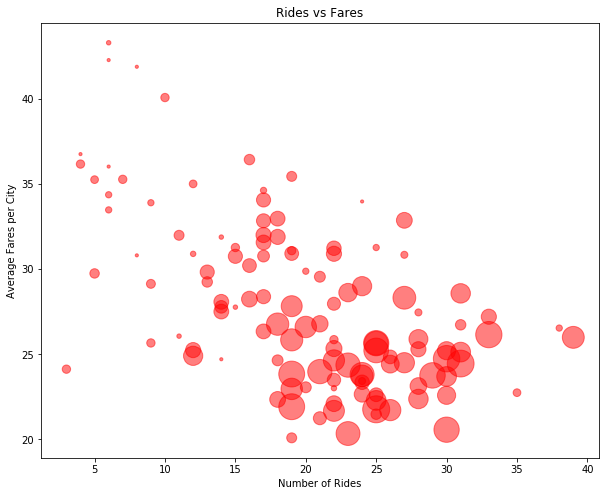

In [61]:
# Rides vs Fares plot
plt.figure(figsize=(10,8))
plt.title('Rides vs Fares')

plt.scatter(df_final['Number of Rides'],df_final['Average Fare'],s=df_final['Number of Drivers']*10,c='red', alpha=0.5)
plt.xlabel('Number of Rides')
plt.ylabel('Average Fares per City')
plt.show()

In [58]:
# Draw % of Total Fares and Rides in pie chart (hint: use subplot)

dfM.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


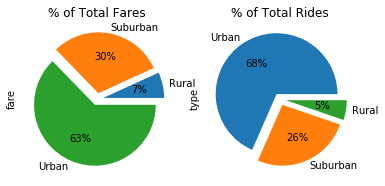

In [74]:
explode = [0.1] * 3


totalFaresPer = dfM.groupby('type')['fare'].sum()
totalRides = dfM['type'].value_counts()

plt.subplot(1,2,1)
totalFaresPer.plot.pie(title='% of Total Fares', explode=explode,autopct='%1.0f%%')
plt.subplot(1,2,2)
totalRides.plot.pie(title='% of Total Rides',explode=explode,autopct='%1.0f%%')
plt.show()